In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.integrate import solve_ivp
import time

## Question 1a

We first set up all the parameters and initialize all functions that determine the ODE for a Van Der Pol Oscillator.

In [2]:
def vdp(t,y,mu):
    
    # The right-hand side for the 2D Van Der Pol Oscillator ODE
    
    dy = np.zeros((2,))
    dy[0] = y[1]
    dy[1] = mu*((1 - y[0]**2)*y[1]) - y[0]
    
    return dy

# parameters and initial condition
mu = 10
t0 = 0
tmax = 1000
epsilon = 1e-6
y0 = np.array([2,0])

We first use the RK4 solver to solve the ODE. We compute the time time taken by the solver to compute for each of the three cases to be considered. We then plot the solutions in phase space for each of the three caes.

The code for RK45 is shown below. Parameters in the cell above have to be tweaked in order to simulate the various cases.

In [3]:
# numerical method: RK45
vdp_solutions_rk45 = []
vdp_times = []

for i in range(3):

    start = time.time()
    
    vdp_solutions_rk45.append(solve_ivp(lambda t, y: vdp(t, y, mu*(10**i)), (t0, tmax), y0, method='RK45', atol=epsilon*10**(-3*i), rtol=epsilon*10**(-3*i)))   
    
    end = time.time()
    elapsed = end - start
    vdp_times.append(elapsed)

We now summarize our results. We write the time it takes to run the numerical solver with the three sets of parameters. We then plot the solutions on a single plot

In [4]:
str('For mu = 10 and epsilon = 10^{-6} the CPU time is ') + str(vdp_times[0]) + str(' seconds')

'For mu = 10 and epsilon = 10^{-6} the CPU time is 1.0001769065856934 seconds'

In [5]:
str('For mu = 100 and epsilon = 10^{-9} the CPU time is ') + str(vdp_times[1]) + str(' seconds')

'For mu = 100 and epsilon = 10^{-9} the CPU time is 5.496794939041138 seconds'

In [6]:
str('For mu = 1000 and epsilon = 10^{-12} the CPU time is ') + str(vdp_times[2]) + str(' seconds')

'For mu = 1000 and epsilon = 10^{-12} the CPU time is 62.97894811630249 seconds'

The CPU time increases as both $\mu$ and $\varepsilon$ are increased. This is expected since the greater than $\mu$ the problem is more stiff/non-linear, and  the problem and RK45 is not really a method to solve stiff ODE problems. In addition, the solution to the problems become highly chaotic, making them difficult to simulate.
Moreover increasing the value of $\varepsilon$ demands higher accurary, hence the CPU time is expected to increase becaue of this as well.



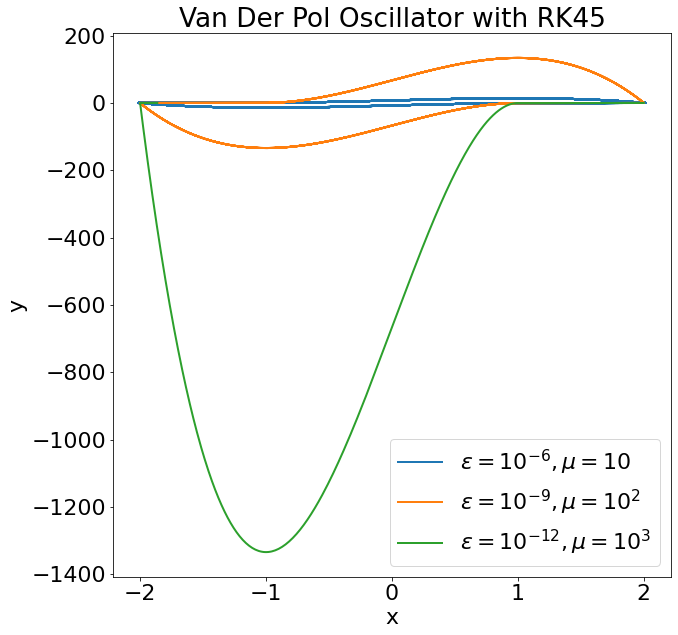

In [7]:
#We now plot the limit cycles for the three cases of interest.

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(vdp_solutions_rk45[0].y[0],vdp_solutions_rk45[0].y[1],linewidth=2,label= r'$\varepsilon = 10^{-6}, \mu = 10$')  
plt.plot(vdp_solutions_rk45[1].y[0],vdp_solutions_rk45[1].y[1],linewidth=2,label= r'$\varepsilon = 10^{-9}, \mu = 10^{2}$')  
plt.plot(vdp_solutions_rk45[2].y[0],vdp_solutions_rk45[2].y[1],linewidth=2,label= r'$\varepsilon = 10^{-12}, \mu = 10^{3}$')  
plt.title("Van Der Pol Oscillator with RK45")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We now use the LSODA solver to solve the ODE. The code is shown below. Parameters in the cell above have to be tweaked in order to simulate the various cases.

## Question 1b

In [8]:
# numerical method: LSODA
    
vdp_solutions_lsoda = []
vdp_times_lsoda = []

for i in range(3):

    start = time.time()
    
    vdp_solutions_lsoda.append(solve_ivp(lambda t, y: vdp(t, y, mu*(10**i)), (t0, tmax), y0, method='LSODA', atol=epsilon*10**(-3*i), rtol=epsilon*10**(-3*i)))   
    
    end = time.time()
    elapsed = end - start
    vdp_times_lsoda.append(elapsed)

We now summarize our results. We write the time it takes to run the numerical solver with the three sets of parameters. We then plot the solutions on a single plot

In [9]:
str('For mu = 10 and epsilon = 10^{-6} the CPU time is ') + str(vdp_times_lsoda[0]) + str(' seconds')

'For mu = 10 and epsilon = 10^{-6} the CPU time is 0.7575831413269043 seconds'

In [10]:
str('For mu = 10 and epsilon = 10^{-6} the CPU time is ') + str(vdp_times_lsoda[1]) + str(' seconds')

'For mu = 10 and epsilon = 10^{-6} the CPU time is 0.12826275825500488 seconds'

In [11]:
str('For mu = 10 and epsilon = 10^{-6} the CPU time is ') + str(vdp_times_lsoda[2]) + str(' seconds')

'For mu = 10 and epsilon = 10^{-6} the CPU time is 0.03346586227416992 seconds'

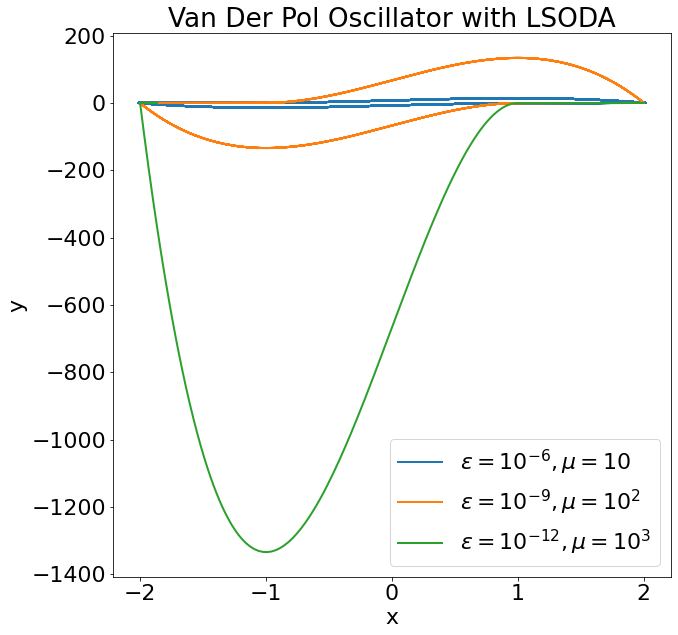

In [12]:
#We now plot the limit cycles for the three cases of interest.

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(vdp_solutions_lsoda[0].y[0],vdp_solutions_lsoda[0].y[1],linewidth=2,label= r'$\varepsilon = 10^{-6}, \mu = 10$')  
plt.plot(vdp_solutions_lsoda[1].y[0],vdp_solutions_lsoda[1].y[1],linewidth=2,label= r'$\varepsilon = 10^{-9}, \mu = 10^{2}$')  
plt.plot(vdp_solutions_lsoda[2].y[0],vdp_solutions_lsoda[2].y[1],linewidth=2,label= r'$\varepsilon = 10^{-12}, \mu = 10^{3}$')  
plt.title("Van Der Pol Oscillator with LSODA")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Question 1b

We first set up all the parameters and initialize all functions that determine the ODE for the Arenstorf problem.

In [32]:
def arenstorf(t, y, mu):
    
    x, y, vx, vy = y
    dydt = [vx, vy,
            2*vy + x - (1 - mu)*(x + mu)/((x + mu)**2 + y**2)**(3/2) - mu*(x - 1 + mu)/((x - 1 + mu)**2 + y**2)**(3/2),
            -2*vx + y - (1 - mu)*y/((x + mu)**2 + y**2)**(3/2) - mu*y/((x - 1 + mu)**2 + y**2)**(3/2)]
    return dydt

# parameters and initial condition
mu = 0.012277471 
t0 = 0
tmax = 17.0652165601579625
y0 = [0.994, 0, 0, -2.00158510637908252]
epsilon = 1e-12

We first test the RK45 solver.

In [35]:
times = []

start = time.time()
solution_arenstorf1 = solve_ivp(lambda t, y: arenstorf(t, y, mu), (t0, tmax), y0, method='RK45', atol=epsilon, rtol=epsilon)
end = time.time()
elapsed = end - start
times.append(elapsed)

start = time.time()
solution_arenstorf2 = solve_ivp(lambda t, y: arenstorf(t, y, mu), (t0, 100), y0, method='RK45', atol=epsilon, rtol=epsilon)
end = time.time()
elapsed = end - start
times.append(elapsed)

In [38]:
str('For RK45 with T = 17.06 the CPU time is ') + str(times[0]) + str(' seconds')

'For RK45 with T = 17.06 the CPU time is 0.22420716285705566 seconds'

In [39]:
str('For RK45 with T = 17.06 the CPU time is ') + str(times[1]) + str(' seconds')

'For RK45 with T = 17.06 the CPU time is 1.0207757949829102 seconds'

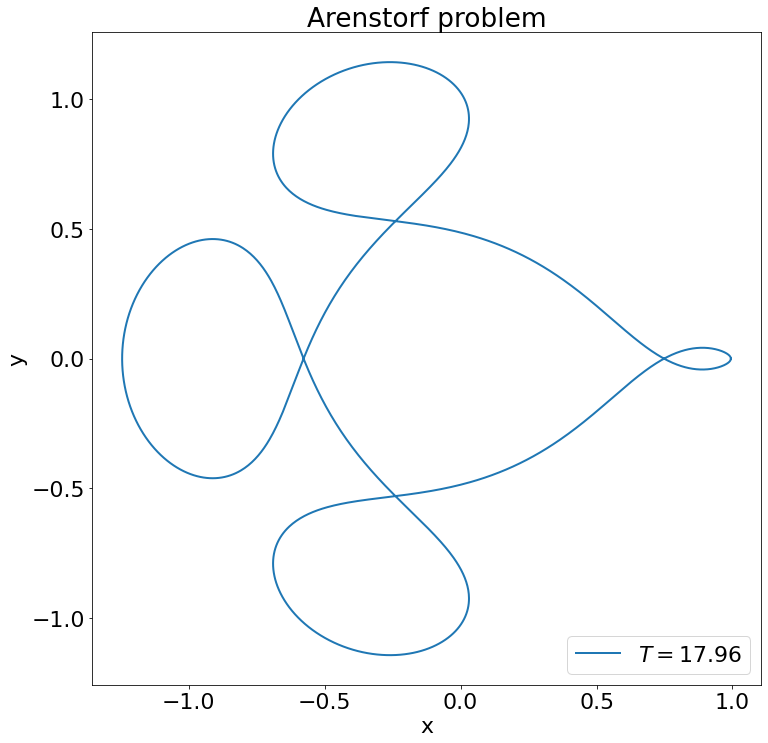

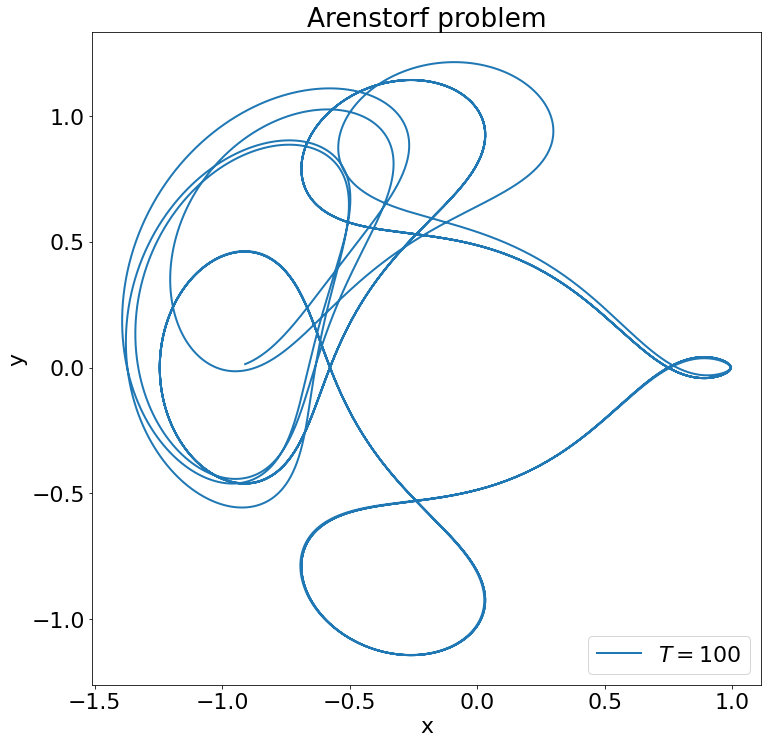

In [41]:
#We now plot the orbit 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(solution_arenstorf1.y[0],solution_arenstorf1.y[1],linewidth=2,label= r'$T = 17.96$') 
#plt.plot(solution_arenstorf2.y[0],solution_arenstorf2.y[1],linewidth=2,label= r'$T = 100$') 
plt.title("Arenstorf problem")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


#We now plot the orbit 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(solution_arenstorf2.y[0],solution_arenstorf2.y[1],linewidth=2,label= r'$T = 100$') 
plt.title("Arenstorf problem")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We now test the DOP853 solver.

In [43]:
times = []

start = time.time()
solution_arenstorf1 = solve_ivp(lambda t, y: arenstorf(t, y, mu), (t0, tmax), y0, method='DOP853', atol=epsilon, rtol=epsilon)
end = time.time()
elapsed = end - start
times.append(elapsed)

start = time.time()
solution_arenstorf2 = solve_ivp(lambda t, y: arenstorf(t, y, mu), (t0, 100), y0, method='DOP853', atol=epsilon, rtol=epsilon)
end = time.time()
elapsed = end - start
times.append(elapsed)

In [44]:
str('For DOP853 with T = 17.06 the CPU time is ') + str(times[0]) + str(' seconds')

'For DOP853 with T = 17.06 the CPU time is 0.08624410629272461 seconds'

In [45]:
str('For DOP853 with T = 100 the CPU time is ') + str(times[1]) + str(' seconds')

'For DOP853 with T = 100 the CPU time is 0.32947826385498047 seconds'

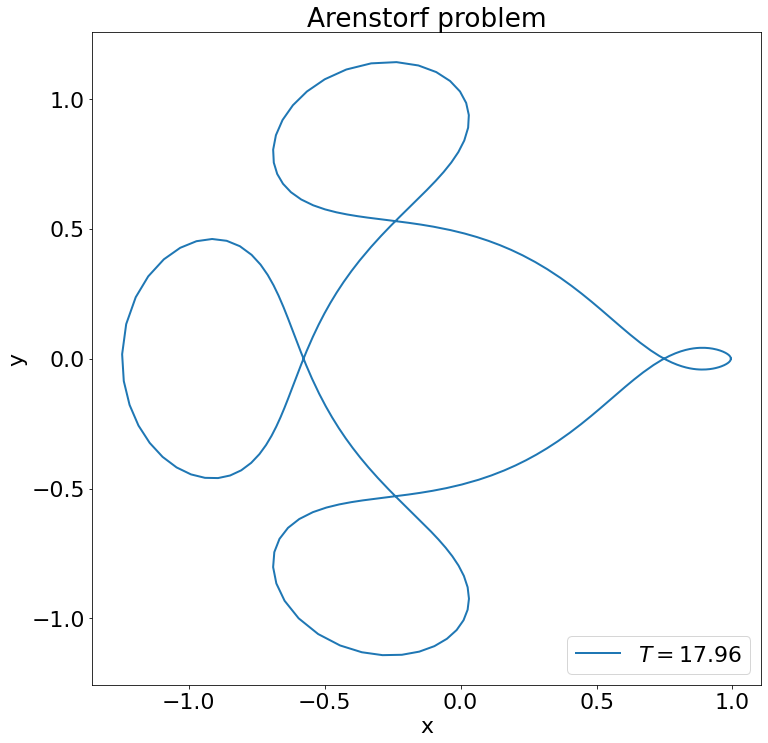

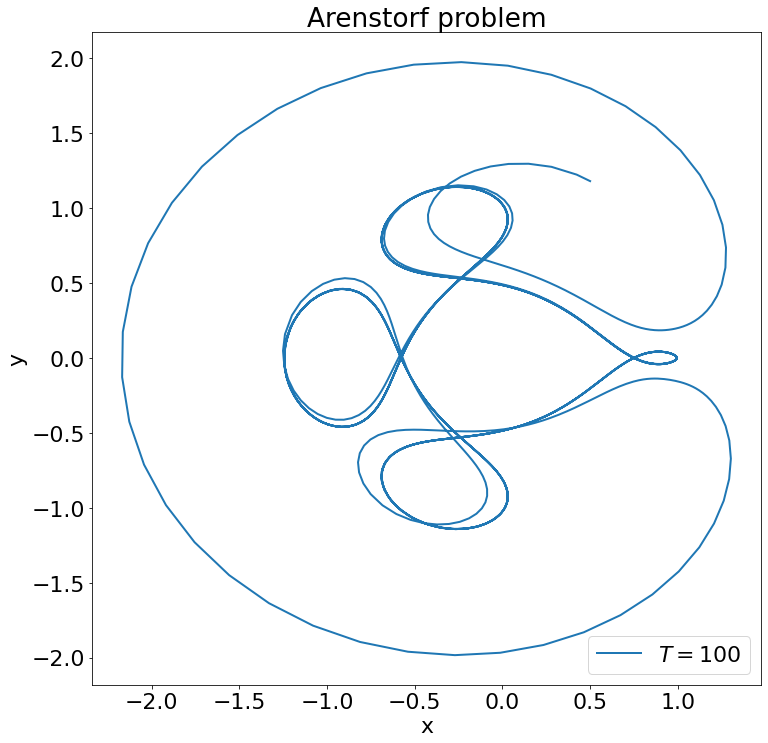

In [46]:
#We now plot the orbit 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(solution_arenstorf1.y[0],solution_arenstorf1.y[1],linewidth=2,label= r'$T = 17.96$') 
#plt.plot(solution_arenstorf2.y[0],solution_arenstorf2.y[1],linewidth=2,label= r'$T = 100$') 
plt.title("Arenstorf problem")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


#We now plot the orbit 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(solution_arenstorf2.y[0],solution_arenstorf2.y[1],linewidth=2,label= r'$T = 100$') 
plt.title("Arenstorf problem")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We now test the Radau solver.

In [48]:
times = []

start = time.time()
solution_arenstorf1 = solve_ivp(lambda t, y: arenstorf(t, y, mu), (t0, tmax), y0, method='Radau', atol=epsilon, rtol=epsilon)
end = time.time()
elapsed = end - start
times.append(elapsed)

start = time.time()
solution_arenstorf2 = solve_ivp(lambda t, y: arenstorf(t, y, mu), (t0, 100), y0, method='Radau', atol=epsilon, rtol=epsilon)
end = time.time()
elapsed = end - start
times.append(elapsed)

In [49]:
str('For Radau with T = 17.06 the CPU time is ') + str(times[0]) + str(' seconds')

'For Radau with T = 17.06 the CPU time is 3.38043212890625 seconds'

In [51]:
str('For Radau with T = 100 the CPU time is ') + str(times[1]) + str(' seconds')

'For Radau with T = 100 the CPU time is 19.081413745880127 seconds'

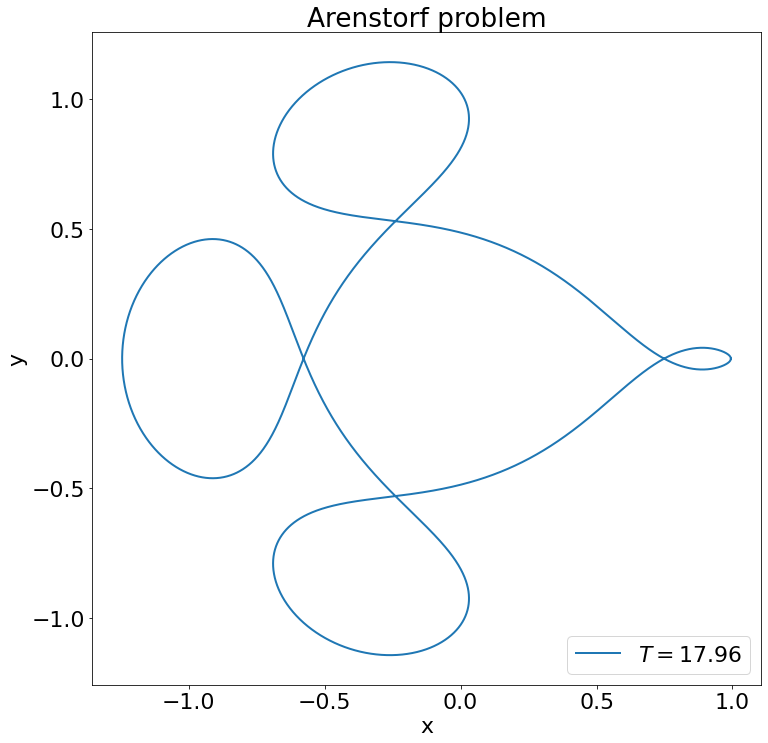

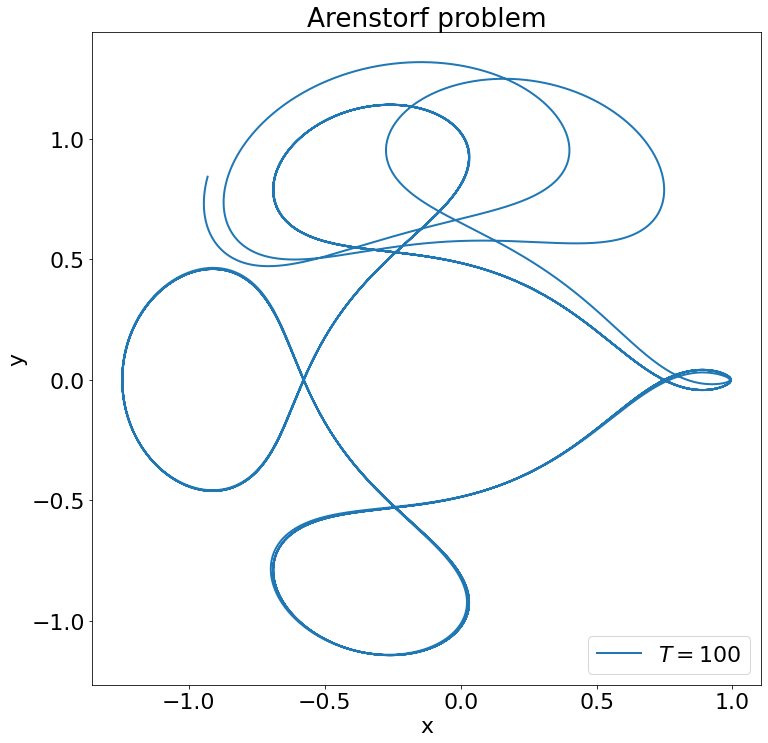

In [52]:
#We now plot the orbit 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(solution_arenstorf1.y[0],solution_arenstorf1.y[1],linewidth=2,label= r'$T = 17.96$') 
#plt.plot(solution_arenstorf2.y[0],solution_arenstorf2.y[1],linewidth=2,label= r'$T = 100$') 
plt.title("Arenstorf problem")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


#We now plot the orbit 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(solution_arenstorf2.y[0],solution_arenstorf2.y[1],linewidth=2,label= r'$T = 100$') 
plt.title("Arenstorf problem")
plt.legend(loc = 'lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The Arenstorf problem is a non-stiff problem. Therefore, we see that RK45 is a good choice. The performance of RK45 is similar to that of DOP853. Radau is marginally slower. This is because since Radua is an implicit, non-linear method. DOP853 and RK45, on the other hand, are explicit, linear methods.

## Question 3

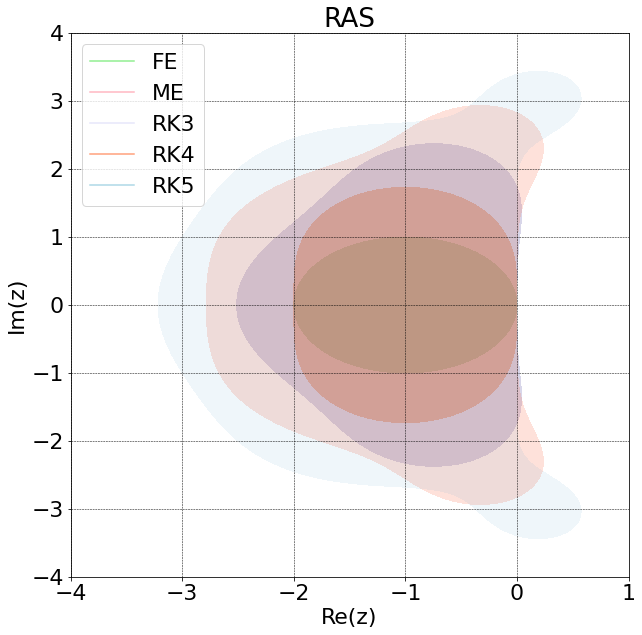

In [68]:
nx = 100
ny = 160
x = np.linspace(-4,1,nx)
y = np.linspace(-4,4,ny)
xg,yg = np.meshgrid(x,y)

z = xg + 1j*yg

f = 1 + z
g = f + 0.5*z*z
h = g + z*z*z/6
i = h + z*z*z*z/24
j = i + z*z*z*z*z/120

absf = (f.real)**2 + (f.imag)**2
absg = (g.real)**2 + (g.imag)**2
absh = (h.real)**2 + (h.imag)**2
absi = (i.real)**2 + (i.imag)**2
absj = (j.real)**2 + (j.imag)**2


plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(10,10))
plt.contourf(xg,yg,absf, np.arange(4), levels=[0,1], cmap='Greens', alpha=0.8)
plt.contourf(xg,yg,absg, np.arange(4), levels=[0,1], cmap='Oranges', alpha=0.6)
plt.contourf(xg,yg,absh, np.arange(4), levels=[0,1], cmap='Purples', alpha=0.4)
plt.contourf(xg,yg,absi, np.arange(4), levels=[0,1], cmap='Reds', alpha=0.2)
plt.contourf(xg,yg,absj, np.arange(4), levels=[0,1], cmap='Blues', alpha=0.1)


FE_line = mlines.Line2D([], [], color='lightgreen', label='FE')
ME_line = mlines.Line2D([], [], color='lightpink', label='ME')
RK3_line = mlines.Line2D([], [], color='lavender', label='RK3')
RK4_line = mlines.Line2D([], [], color='lightsalmon', label='RK4')
RK5_line = mlines.Line2D([], [], color='lightblue', label='RK5')
plt.legend(handles=[FE_line, ME_line, RK3_line, RK4_line, RK5_line], loc='upper left')

plt.title("RAS")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()